# Precipitation Extremes Analysis

### Load the file as an xarray dataset with dask enabled

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
file_path = "/glade/scratch/nanr/forKatie/daily/"

In [3]:
var = "PRECT"

In [4]:
file = "b.e13.BRCP85C5CN.ne120_g16.001.cam.h1.PRECT.20700101-21001231.FV.nc"

In [5]:
#ds = xr.open_dataset(file_path+file)
# How to choose chunk size?
# https://docs.dask.org/en/latest/array-best-practices.html
# https://examples.dask.org/xarray.html
ds = xr.open_dataset(file_path+file, chunks={'time': 100, 'lat': 768, 'lon': 576})

In [6]:
ds

<xarray.Dataset>
Dimensions:       (ilev: 31, lat: 768, lev: 30, lon: 1152, nbnd: 2, slat: 767, slon: 1152, time: 11315)
Coordinates:
  * lat           (lat) float64 -90.0 -89.77 -89.53 -89.3 ... 89.53 89.77 90.0
  * lon           (lon) float64 0.0 0.3125 0.625 0.9375 ... 359.1 359.4 359.7
  * slat          (slat) float64 -89.88 -89.65 -89.41 ... 89.41 89.65 89.88
  * slon          (slon) float64 0.0 0.1562 0.4688 0.7812 ... 358.9 359.2 359.5
  * ilev          (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * lev           (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * time          (time) object 2070-01-02 00:00:00 ... 2101-01-01 00:00:00
Dimensions without coordinates: nbnd
Data variables:
    w_stag        (slat) float64 dask.array<chunksize=(767,), meta=np.ndarray>
    lat_bnds      (lat, nbnd) float64 dask.array<chunksize=(768, 2), meta=np.ndarray>
    lon_bnds      (lon, nbnd) float64 dask.array<chunksize=(576, 2), meta=np.ndarray>
    gw          

In [7]:
# TO DO: figure out how to select maximum index value, instead of having to specify?
# CAM question: which lev index do you use to get surface values?
#ds_surf = ds.sel(ilev=1000)
#ds_surf = ds.sel(lev=1000, method='nearest')
#ds_surf

In [7]:
# PRECT is a surface field so no need to worry about vertical coordinates
PRECT = ds.PRECT # now this is a DataArray
PRECT

<xarray.DataArray 'PRECT' (time: 11315, lat: 768, lon: 1152)>
dask.array<open_dataset-2afa4a566fe9415823d6ee692319fee0PRECT, shape=(11315, 768, 1152), dtype=float32, chunksize=(100, 768, 576), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -89.77 -89.53 -89.3 ... 89.3 89.53 89.77 90.0
  * lon      (lon) float64 0.0 0.3125 0.625 0.9375 ... 358.8 359.1 359.4 359.7
  * time     (time) object 2070-01-02 00:00:00 ... 2101-01-01 00:00:00
Attributes:
    units:          m/s
    long_name:      Total (convective and large-scale) precipitation rate (li...
    cell_methods:   time: mean
    cell_measures:  area: area

In [8]:
# This reveals actual chunk size (176.95MB)
PRECT.data

,Array,Chunk
Bytes,40.04 GB,176.95 MB
Shape,"(11315, 768, 1152)","(100, 768, 576)"
Count,229 Tasks,228 Chunks
Type,float32,numpy.ndarray


In [9]:
# This is fast now because it's a dask array
PRECT_amean = PRECT.mean(dim='time')
PRECT_amean
PRECT_amean.data

dask.array<mean_agg-aggregate, shape=(768, 1152), dtype=float32, chunksize=(768, 576), chunktype=numpy.ndarray>

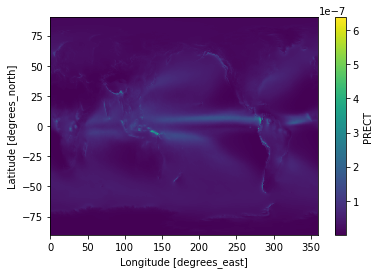

In [21]:
# This is still slow...but it works eventually
#PRECT_amean.plot();

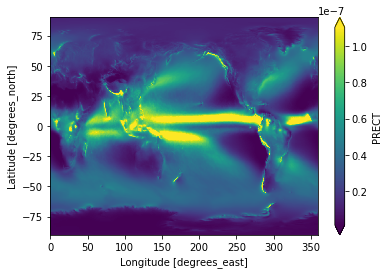

In [22]:
# Get rid of pesky outliers in plotting
# Again, still slow because it's now doing the annual mean computation
#PRECT_amean.load().plot(robust=True);

In [10]:
from dask.diagnostics import ProgressBar

In [15]:
with ProgressBar():
    result = PRECT_amean.compute()
result

[########################################] | 100% Completed |  4min 43.8s


<xarray.DataArray 'PRECT' (lat: 768, lon: 1152)>
array([[3.20875704e-09, 3.20875704e-09, 3.20875704e-09, ...,
        3.20875704e-09, 3.20875704e-09, 3.20875704e-09],
       [3.08890469e-09, 3.08811665e-09, 3.08733128e-09, ...,
        3.09185122e-09, 3.09086667e-09, 3.08988479e-09],
       [3.01066416e-09, 3.00908876e-09, 3.00751823e-09, ...,
        3.01655700e-09, 3.01458813e-09, 3.01262393e-09],
       ...,
       [1.22972619e-08, 1.22989317e-08, 1.23006005e-08, ...,
        1.22970194e-08, 1.22971002e-08, 1.22971828e-08],
       [1.22925021e-08, 1.22933370e-08, 1.22941701e-08, ...,
        1.22923813e-08, 1.22924213e-08, 1.22924622e-08],
       [1.22265105e-08, 1.22265105e-08, 1.22265105e-08, ...,
        1.22265105e-08, 1.22265105e-08, 1.22265105e-08]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.77 -89.53 -89.3 ... 89.3 89.53 89.77 90.0
  * lon      (lon) float64 0.0 0.3125 0.625 0.9375 ... 358.8 359.1 359.4 359.7

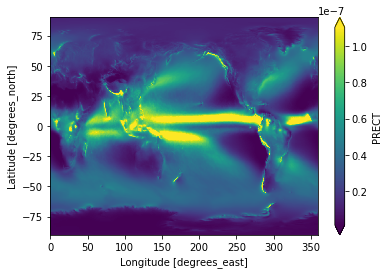

In [16]:
# So now this is fast since we computed above
result.plot(robust=True);

### Experimenting with Dask Distributed
TO DO: figure out how to do this effectively

In [11]:
import dask
from dask.distributed import Client, LocalCluster

In [12]:
print(dask.__version__)
print(xr.__version__)

2.6.0
0.14.0


In [14]:
dask.config.get('distributed.dashboard.link')
dask.config.set({'distributed.dashboard.link': "/proxy/{port}/status"});

In [51]:
# Setup a local cluster.
# By default this sets up 1 worker per core
#cluster = LocalCluster()
# https://stackoverflow.com/questions/53936237/managing-worker-memory-on-a-dask-localcluster
cluster = LocalCluster(n_workers=15) 
cluster

☝️ Don't forget to click the link above to view the scheduler dashboard! (you may wish to have both the notebook and dashboard side-by-side)

NOTE: the above auto-generated link is incorrect. Need to add /dav/user/kdagon/lab \
As in: https://jupyterhub.ucar.edu/dav/user/kdagon/proxy/8787/status

In [ ]:
client = Client(cluster) # Connect to a Dask cluster in order to submit computation
client

In [ ]:
%time PRECT_amean.compute()

In [ ]:
%%time 
PRECT_amean.plot(robust=True);

In [54]:
client.close()
cluster.close()

distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:40956 remote=tcp://127.0.0.1:43264>


In [55]:
result

<xarray.DataArray 'PRECT' (lat: 768, lon: 1152)>
array([[3.20875704e-09, 3.20875704e-09, 3.20875704e-09, ...,
        3.20875704e-09, 3.20875704e-09, 3.20875704e-09],
       [3.08890469e-09, 3.08811665e-09, 3.08733128e-09, ...,
        3.09185122e-09, 3.09086667e-09, 3.08988479e-09],
       [3.01066416e-09, 3.00908876e-09, 3.00751823e-09, ...,
        3.01655700e-09, 3.01458813e-09, 3.01262393e-09],
       ...,
       [1.22972619e-08, 1.22989317e-08, 1.23006005e-08, ...,
        1.22970194e-08, 1.22971002e-08, 1.22971828e-08],
       [1.22925021e-08, 1.22933370e-08, 1.22941701e-08, ...,
        1.22923813e-08, 1.22924213e-08, 1.22924622e-08],
       [1.22265105e-08, 1.22265105e-08, 1.22265105e-08, ...,
        1.22265105e-08, 1.22265105e-08, 1.22265105e-08]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.77 -89.53 -89.3 ... 89.3 89.53 89.77 90.0
  * lon      (lon) float64 0.0 0.3125 0.625 0.9375 ... 358.8 359.1 359.4 359.7

### Try the NCARCluster functionality

https://github.com/NCAR/ncar-jobqueue

In [13]:
from ncar_jobqueue import NCARCluster

In [30]:
cluster = NCARCluster(project='p06010014')

/glade/work/kdagon/miniconda/envs/CMIP6-201910/lib/python3.7/site-packages/distributed/dashboard/core.py:72: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn("\n" + msg)


In [31]:
cluster

TO DO: figure out how to scale the cluster appropriately for the task

In [32]:
cluster.scale(2)

In [33]:
cluster

In [34]:
client = Client(cluster)

In [35]:
client

Client Scheduler: tcp://128.117.181.209:38339 Dashboard: https://jupyterhub.ucar.edu/dav/user/kdagon/proxy/34697/status,Cluster Workers: 2 Cores: 2 Memory: 50.00 GB


In [36]:
client.get_versions(check=True)['scheduler']

{'host': (('python', '3.7.3.final.0'),
  ('python-bits', 64),
  ('OS', 'Linux'),
  ('OS-release', '3.10.0-693.21.1.el7.x86_64'),
  ('machine', 'x86_64'),
  ('processor', 'x86_64'),
  ('byteorder', 'little'),
  ('LC_ALL', 'en_US.UTF-8'),
  ('LANG', 'en_US.UTF-8'),
  ('LOCALE', 'en_US.UTF-8')),
 'packages': {'required': (('dask', '2.6.0'),
   ('distributed', '2.6.0'),
   ('msgpack', '0.6.2'),
   ('cloudpickle', '1.2.2'),
   ('tornado', '6.0.3'),
   ('toolz', '0.10.0')),
  'optional': (('numpy', '1.17.2'),
   ('pandas', '0.25.1'),
   ('bokeh', '1.3.4'),
   ('lz4', '2.2.1'),
   ('dask_ml', '1.0.0'),
   ('blosc', '1.8.1'))}}

So this is a little faster (3min 34s) than previous attempt with the progress bar (4min 43s)

In [37]:
%time PRECT_amean.compute()

CPU times: user 13.3 s, sys: 1.46 s, total: 14.8 s
Wall time: 3min 43s


<xarray.DataArray 'PRECT' (lat: 768, lon: 1152)>
array([[3.20875704e-09, 3.20875704e-09, 3.20875704e-09, ...,
        3.20875704e-09, 3.20875704e-09, 3.20875704e-09],
       [3.08890469e-09, 3.08811665e-09, 3.08733128e-09, ...,
        3.09185122e-09, 3.09086667e-09, 3.08988479e-09],
       [3.01066416e-09, 3.00908876e-09, 3.00751823e-09, ...,
        3.01655700e-09, 3.01458813e-09, 3.01262393e-09],
       ...,
       [1.22972619e-08, 1.22989317e-08, 1.23006005e-08, ...,
        1.22970194e-08, 1.22971002e-08, 1.22971828e-08],
       [1.22925021e-08, 1.22933370e-08, 1.22941701e-08, ...,
        1.22923813e-08, 1.22924213e-08, 1.22924622e-08],
       [1.22265105e-08, 1.22265105e-08, 1.22265105e-08, ...,
        1.22265105e-08, 1.22265105e-08, 1.22265105e-08]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.77 -89.53 -89.3 ... 89.3 89.53 89.77 90.0
  * lon      (lon) float64 0.0 0.3125 0.625 0.9375 ... 358.8 359.1 359.4 359.7

CPU times: user 11.5 s, sys: 1.43 s, total: 13 s
Wall time: 3min 37s


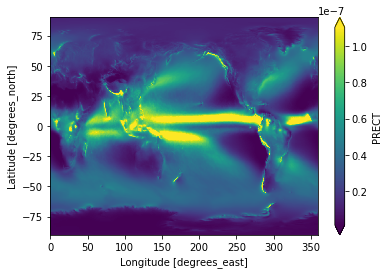

In [38]:
%%time 
PRECT_amean.plot(robust=True);

To close the cluster and release workers

In [29]:
#cluster.close()

Additional example setting up a cluster, from Gustavo\
https://nbviewer.jupyter.org/gist/gustavo-marques/2a8ab5a0f6135bb1cfa6c91c16bddbe6

In [39]:
#cluster = NCARCluster(project='p06010014', memory = '10GB')
#cluster.scale(20)
#dask.config.set({'distributed.dashboard.link': '/proxy/{port}/status'})
#client = Client(cluster)
#print(cluster.dashboard_link)

### Subset data for CONUS (to try and reduce data size)

In [40]:
# http://en.wikipedia.org/wiki/Extreme_points_of_the_United_States#Westernmost
top = 49.3457868 # north lat
left = -124.7844079 # west long
right = -66.9513812 # east long
bottom =  24.7433195 # south lat

TO DO: how to subset land points only within this domain? Need a CAM landmask for this resolution (regridded...)

In [41]:
# Accounting for longitude conversion from -180,180 to 0,360
PRECT_CONUS = PRECT.sel(lat=slice(bottom,top),lon=slice(360+left,360+right))

In [42]:
PRECT_CONUS

<xarray.DataArray 'PRECT' (time: 11315, lat: 105, lon: 185)>
dask.array<getitem, shape=(11315, 105, 185), dtype=float32, chunksize=(100, 105, 185), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 24.76 24.99 25.23 25.46 ... 48.46 48.7 48.93 49.17
  * lon      (lon) float64 235.3 235.6 235.9 236.2 ... 291.9 292.2 292.5 292.8
  * time     (time) object 2070-01-02 00:00:00 ... 2101-01-01 00:00:00
Attributes:
    units:          m/s
    long_name:      Total (convective and large-scale) precipitation rate (li...
    cell_methods:   time: mean
    cell_measures:  area: area

In [43]:
PRECT_CONUS.data

,Array,Chunk
Bytes,879.18 MB,7.77 MB
Shape,"(11315, 105, 185)","(100, 105, 185)"
Count,343 Tasks,114 Chunks
Type,float32,numpy.ndarray


Execute compute so the CONUS values are read into memory\
TO DO: speed this up with a distributed cluster? Currently takes ~3 min\
General question of when to execute "compute" in workflow

In [44]:
#with ProgressBar():
#    PRECT_CONUS_comp = PRECT_CONUS.compute()
#PRECT_CONUS_comp

In [45]:
%%time
PRECT_CONUS_comp = PRECT_CONUS.compute()

CPU times: user 9.35 s, sys: 21.2 s, total: 30.5 s
Wall time: 3min 1s


### Mask out where precip < 1 mm/day
or < 1/(1000*86400) m/s

In [48]:
p_dry = 1/(1000*86400) # m/s

In [49]:
p_dry

1.1574074074074074e-08

In [50]:
PRECT_CONUS_mask = PRECT_CONUS_comp.where(PRECT_CONUS_comp >= p_dry)

In [51]:
PRECT_CONUS_mask

<xarray.DataArray 'PRECT' (time: 11315, lat: 105, lon: 185)>
array([[[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        ...,
        [7.89129729e-07, 7.40274913e-07, 6.07570314e-07, ...,
         8.78672708e-08, 6.89973092e-08, 5.78262878e-08],
        [7.63383980e-07, 6.30482987e-07, 4.54042663e-07, ...,
         9.01334118e-08, 6.95231748e-08, 5.17550340e-08],
        [5.76895673e-07, 4.23091620e-07, 3.74426236e-07, ...,
         9.25645836e-08, 7.45572279e-08, 5.33455378e-08]],

       [[           nan,            nan,            nan, ...,
                    nan, 1.30620155e-08, 2.41110207e-08],
        [           nan,            nan,            nan, ...,
                    na

In [52]:
time0_mask = PRECT_CONUS_mask[0,:,:]

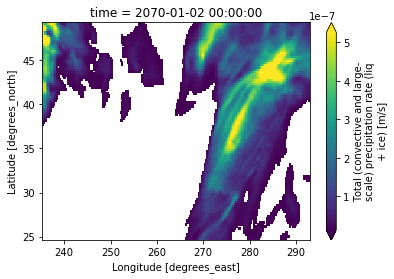

In [53]:
time0_mask.plot(robust=True);

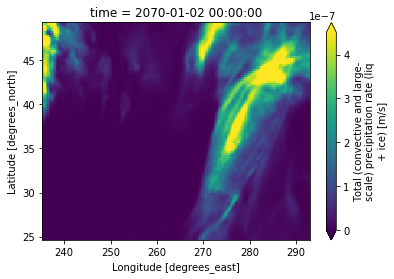

In [54]:
time0 = PRECT_CONUS[0,:,:]
time0.plot(robust=True);

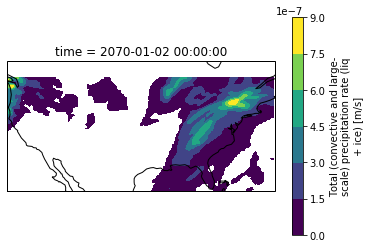

In [55]:
import cartopy.crs as ccrs
ax = plt.axes(projection=ccrs.PlateCarree())
PRECT_CONUS_mask.isel(time=0).plot.contourf(ax=ax, transform=ccrs.PlateCarree());
ax.set_extent([360+left,360+right,bottom,top])
ax.coastlines();

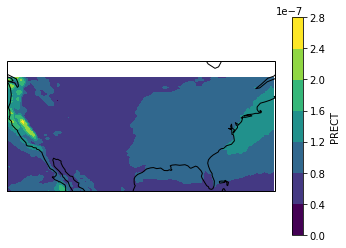

In [56]:
ax = plt.axes(projection=ccrs.PlateCarree())
PRECT_CONUS_mask.mean(dim='time').plot.contourf(ax=ax, transform=ccrs.PlateCarree());
ax.set_extent([360+left,360+right,bottom,top])
ax.coastlines();
# This shows all points have at least some data (i.e., no gridpoint is masked for all time points)

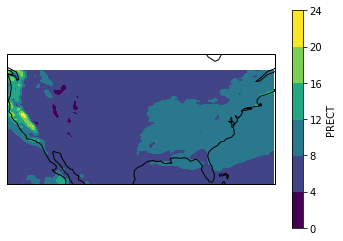

In [57]:
PRECT_CONUS_mask_mm = PRECT_CONUS_mask*1000*86400
ax = plt.axes(projection=ccrs.PlateCarree())
PRECT_CONUS_mask_mm.mean(dim='time').plot.contourf(ax=ax, transform=ccrs.PlateCarree());
ax.set_extent([360+left,360+right,bottom,top])
ax.coastlines();

Compute the 90th percentile for each gridpoint including only non-dry days\
This takes a while because quantile does not operate on dask arrays

TO DO: seasonal quantiles?

In [58]:
#p90 = PRECT_CONUS_mask.compute().quantile(0.9, dim='time')
p90 = PRECT_CONUS_mask.quantile(0.9, dim='time')

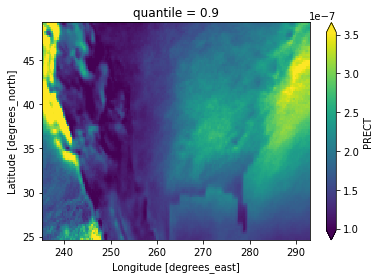

In [59]:
p90.plot(robust=True);

In [60]:
p90_mm = p90*1000*86400 # convert to mm/day

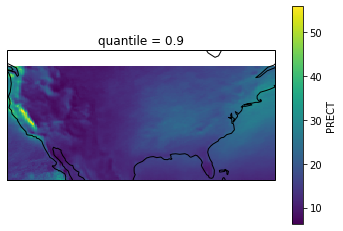

In [61]:
ax = plt.axes(projection=ccrs.PlateCarree())
p90_mm.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree());
ax.set_extent([360+left,360+right,bottom,top])
ax.coastlines();

In [64]:
cluster.close()

In [63]:
client.close()